# Gathering Data


In [1]:
#Import Necessary Python Libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import tweepy
import datetime as dt
import seaborn as sns
from tweepy import OAuthHandler
from timeit import default_timer as timer

%matplotlib inline

In [2]:
#Read In Twitter Archive CSV file into twitter_Archive dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#Read in image predictions TSV file
image_predict = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [9]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [11]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
#print(end - start)
#print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [12]:
#tweet_extended_df = pd.read_csv('tweet_json.txt', sep=" ", header=None)
tweet_extended_df = pd.read_json('tweet_json.txt',lines=True )
tweet_extended_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36494,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7762,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31464,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5753,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23703,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3808,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",39835,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7929,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38034,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8555,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
lists = [] #empty list to store dictionaries
with open('tweet_json.txt') as file:
    #lines = tweet_extended_df
    lines = file.read().splitlines()
    for line in lines:
        data = json.loads(line)
        row = {
            'tweet_id'      : data['id'],
            'retweet_count' : data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        lists.append(row)
df_tweet_data = pd.DataFrame(lists,columns=['tweet_id','retweet_count','favorite_count'])

# Assessing Data

In [14]:
df_tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7762,36494
1,892177421306343426,5753,31464
2,891815181378084864,3808,23703
3,891689557279858688,7929,39835
4,891327558926688256,8555,38034
5,891087950875897856,2858,19140
6,890971913173991426,1869,11149
7,890729181411237888,17334,61548
8,890609185150312448,3943,26363
9,890240255349198849,6753,30146


In [15]:
tweet_extended_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [16]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
#Confirm how many tweets came from the various sources in the twitter archive data
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
#Check how many of the records in the twitter archive df are retweets
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [20]:
#Identify what names are the most common from the archive data
#'None' and 'a' names need to be corrected
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Buddy          7
Bailey         7
Toby           7
an             7
Koda           6
Jax            6
Leo            6
Dave           6
Scout          6
Jack           6
Stanley        6
Bella          6
Oscar          6
Rusty          6
Milo           6
Phil           5
            ... 
Severus        1
Beemo          1
Pancake        1
Hamrick        1
Tobi           1
Joshwa         1
Creg           1
Hubertson      1
Marlee         1
Enchilada      1
Kane           1
Dug            1
Shikha         1
Arya           1
Bradley        1
Blakely        1
Jed            1
Glenn          1
Bobbay         1
Jebberson      1
Goliath        1
Dale           1
Amber          1
Bodie          1
Stormy         1
Brudge         1
Tonks          1
Lillie        

In [21]:
#Sort by rating numerator values
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [22]:
#Check is there any duplicated id's in the .txt file
tweet_extended_df[tweet_extended_df.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [23]:
#Check the three dataframes for all unique values
twitter_archive.tweet_id.nunique()

2356

In [24]:
df_tweet_data.tweet_id.nunique()

2331

In [25]:
tweet_extended_df.id.nunique()

2331

In [26]:
image_predict.tweet_id.nunique()

2075

In [27]:
#Confirm there is no duplicated values in the json.txt datafrane df_tweet_data
df_tweet_data[df_tweet_data.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [28]:
#Confirm there is no duplicated values in the image predictions data
image_predict[image_predict.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [29]:
#Identify rows where more that one >1 of the dog stage columns does not have None as a value
multiple = twitter_archive.loc[(twitter_archive[['doggo', 'pupper', 'floofer', 'puppo']] != 'None').sum(axis=1) > 1]
list(multiple.index)
excluded_index = list(multiple.index)

In [30]:
#Show the 14 rows that have more than one dog stage selected.
excluded_index

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [31]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
#p1_conf confidence % average
image_predict.p1_conf.mean()

0.59454826361445778

In [33]:
#create blank list MaxConf which stores the maximum confidence for each row between the three columns specified below, append result to an array. 
MaxConf = []
for x in range(len(image_predict)):
    array = max(image_predict['p1_conf'][image_predict.index[x]],image_predict['p2_conf'][image_predict.index[x]],image_predict['p3_conf'][image_predict.index[x]])
    MaxConf.append(array) 

In [34]:
#Show MaxConf list values
MaxConf

[0.46507399999999999,
 0.506826,
 0.59646100000000002,
 0.40814299999999998,
 0.560311,
 0.65113699999999997,
 0.93301199999999995,
 0.69251700000000005,
 0.96246500000000001,
 0.20149300000000001,
 0.77593000000000001,
 0.50367200000000001,
 0.26085700000000001,
 0.48981400000000003,
 0.195217,
 0.58233000000000001,
 0.29861700000000002,
 0.96593200000000001,
 0.086501999999999996,
 0.17605299999999999,
 0.85753099999999993,
 0.91467100000000001,
 0.41666900000000001,
 0.85874400000000006,
 0.33687399999999995,
 0.99649600000000005,
 0.32646700000000001,
 0.97810799999999998,
 0.52913900000000003,
 0.40464,
 0.14968000000000001,
 0.90677700000000006,
 0.371361,
 0.50518399999999997,
 0.18412999999999999,
 0.67185299999999992,
 0.32208400000000004,
 0.27895399999999998,
 0.044333400000000002,
 0.44780300000000001,
 0.97540099999999996,
 0.88770700000000002,
 0.546933,
 0.37505699999999997,
 0.61831599999999998,
 0.999888,
 0.32879200000000003,
 0.49695299999999998,
 0.35938300000000001

# Clean Data

<b>Quality Issues:</b>

<li>	Unnecessary html tags in Source column. Convert into their values. </li>
<li> Remove columns using drop() that hold no / low amounts of data or data that is not required. </li>
<li>	Identify and remove dogs from analysis that contain more than one dog stage.</li>
<li>	Identify and remove all rows that are not dogs.</li>
<li>	Bad naming of columns.</li>
<li>	No column available to interpret what gender the dog is. Extract from text column.</li>
<li>	Correct invalid name column entries</li>
<li>	Tweet Date values in incorrect data format</li>
<li>	Remove retweet related rows from dataframe.</li>
<li>	Incorrect values displaying in rating numerator columns for values with decimal.</li>

<b>Tidiness Issues:</b>

<li>	Dog stages are spaced among multiple columns (4), create one single column called stage, Drop Dog Stage columns </li>
<li> Extract dog breed and correlating confidence % from p#, p#_conf and p#_dog columns.</li>
<li>	All three data sources can be combined into one master dataframe.</li>


In [35]:
#Copies created of each dataframe
Copy_twitter_archive = twitter_archive.copy()
Copy_tweet_extended_df = tweet_extended_df.copy()
Copy_image_predict = image_predict.copy()

<b>Define</b>

All three data sources can be combined into one master dataframe.


<b>Code</b>

In [36]:
#Join All dataframes together
all_df = twitter_archive.set_index('tweet_id').join(tweet_extended_df.set_index('id_str'),lsuffix='_basic', rsuffix='_extended')
all_df = all_df.join(image_predict.set_index('tweet_id'),lsuffix='', rsuffix='_breed')

<b>Test</b>

In [37]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 58 columns):
in_reply_to_status_id_basic       78 non-null float64
in_reply_to_user_id_basic         78 non-null float64
timestamp                         2356 non-null object
source_basic                      2356 non-null object
text                              2356 non-null object
retweeted_status_id               181 non-null float64
retweeted_status_user_id          181 non-null float64
retweeted_status_timestamp        181 non-null object
expanded_urls                     2297 non-null object
rating_numerator                  2356 non-null int64
rating_denominator                2356 non-null int64
name                              2356 non-null object
doggo                             2356 non-null object
floofer                           2356 non-null object
pupper                            2356 non-null object
puppo                             2356 non

<b>Define</b>

Remove retweet related rows from dataframe.

<b>Code</b>

In [38]:
all_df = all_df[all_df['retweeted_status_id'].isnull()]

<b>Test</b>

In [39]:
all_df.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

<b>Define</b>

Remove columns using drop() that hold no / low amounts of data or data that is not required. 


<b>Code</b>

In [40]:
#drop all columns were little or no values are found, also those not necessary
all_df.drop(columns=['contributors', 'coordinates', 'geo', 'place', 'in_reply_to_status_id_basic', 
                     'in_reply_to_user_id_basic', 'in_reply_to_screen_name', 'in_reply_to_status_id_extended', 
                     'in_reply_to_status_id_str', 'in_reply_to_user_id_extended', 'in_reply_to_user_id_str', 
                     'quoted_status', 'quoted_status_id','is_quote_status', 'quoted_status_id_str', 'quoted_status_permalink', 
                     'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status',
                     'retweeted_status_timestamp', 'source_extended', 'expanded_urls', 'lang', 'possibly_sensitive', 'possibly_sensitive_appealable', 'truncated', 'user', 'display_text_range', 'entities', 'extended_entities'], inplace=True)

<b>Test</b>

In [41]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 28 columns):
timestamp             2175 non-null object
source_basic          2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
created_at            1417 non-null datetime64[ns]
favorite_count        1417 non-null float64
favorited             1417 non-null object
full_text             1417 non-null object
id                    1417 non-null float64
retweet_count         1417 non-null float64
retweeted             1417 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null

In [42]:
#Jpg_url & img_num columns are also not required for analysis, and can be dropped
all_df.drop(columns=['jpg_url', 'img_num'], inplace=True)

<b>Define</b>

Identify and remove dogs from analysis that contain more than one dog stage.


<b>Code</b>

In [43]:
all_df.loc[(all_df[['doggo', 'pupper', 'floofer', 'puppo']] != 'None').sum(axis=1) > 1]

,timestamp,source_basic,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,retweeted,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,None,doggo,None,None,puppo,...,False,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,None,doggo,floofer,None,None,...,False,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo,None,pupper,None,...,NaN,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,doggo,None,pupper,None,...,NaN,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,doggo,None,pupper,None,...,NaN,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,doggo,None,pupper,None,...,False,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,None,pupper,None,...,False,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,doggo,None,pupper,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,doggo,None,pupper,None,...,False,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True


In [44]:
#Identify rows where more that one >1 of the dog stage columns does not have None as a value
multiple = all_df.loc[(all_df[['doggo', 'pupper', 'floofer', 'puppo']] != 'None').sum(axis=1) > 1]
list(multiple.index)
excluded_index = list(multiple.index)

In [45]:
#dataframe excludes 14 rows with multiple dog stages selected
all_df_new = all_df.loc[~all_df.index.isin(excluded_index)]

<b>Test</b>

In [46]:
#Identify rows that have more than one dog style category selected
all_df_new.loc[(all_df_new[['doggo', 'pupper', 'floofer', 'puppo']] != 'None').sum(axis=1) > 1]

,timestamp,source_basic,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,retweeted,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,


In [47]:
all_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 892420643555336193 to 666020888022790149
Data columns (total 26 columns):
timestamp             2163 non-null object
source_basic          2163 non-null object
text                  2163 non-null object
rating_numerator      2163 non-null int64
rating_denominator    2163 non-null int64
name                  2163 non-null object
doggo                 2163 non-null object
floofer               2163 non-null object
pupper                2163 non-null object
puppo                 2163 non-null object
created_at            1409 non-null datetime64[ns]
favorite_count        1409 non-null float64
favorited             1409 non-null object
full_text             1409 non-null object
id                    1409 non-null float64
retweet_count         1409 non-null float64
retweeted             1409 non-null object
p1                    1983 non-null object
p1_conf               1983 non-null float64
p1_dog                1983 non-null

<b>Define</b>

Unnecessary html tags in Source column. Convert into their values.

<b>Code</b>

In [48]:
#rename souce_basic column to just source and rename column values in text to iPhone, Twitter, Vine, TweetDeck
all_df_new.source_basic.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
all_df_new.source_basic.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
all_df_new.source_basic.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
all_df_new.source_basic.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<b>Test</b>

In [49]:
all_df_new.source_basic.value_counts()

iPhone       2031
Vine           90
Twitter        31
Tweetdeck      11
Name: source_basic, dtype: int64

<b>Define</b>

Extract dog breed and correlating confidence % from p#, p#_conf and p#_dog columns.

<b>Code</b>


In [50]:
#Create two new columns to store the dog breed & the confidence value for that row
#Empty Lists
breed = []
confidence = []
#define function
#Append values to lists above if conditons are met
def get_breed_and_conf(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence.append(np.nan)
#Apply the function to the master df        
all_df_new.apply(get_breed_and_conf, axis=1)
#New Column Values = List values
all_df_new['breed'] = breed
all_df_new['confidence'] = confidence

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<b>Test</b>

In [51]:
#Test - view breed values
#Tweet ID's with breed listed as 'not identified' are not dogs
all_df_new['breed']

tweet_id
892420643555336193                 Not identified
892177421306343426                      Chihuahua
891815181378084864                      Chihuahua
891689557279858688             Labrador_retriever
891327558926688256                         basset
891087950875897856       Chesapeake_Bay_retriever
890971913173991426                    Appenzeller
890729181411237888                     Pomeranian
890609185150312448                  Irish_terrier
890240255349198849                       Pembroke
890006608113172480                        Samoyed
889880896479866881                 French_bulldog
889665388333682689                       Pembroke
889638837579907072                 French_bulldog
889531135344209921               golden_retriever
889278841981685760                        whippet
888917238123831296               golden_retriever
888804989199671297               golden_retriever
888554962724278272                 Siberian_husky
888078434458587136                 French

<b>Define</b>

Identify and remove all rows that are not dogs.

<b>Code</b>

In [52]:
#Exclude all rows that contain all false values for the dog predictions
all_df_new = all_df_new.query('p1_dog == True or p2_dog == True or p3_dog == True')

<b>Test</b>

In [53]:
all_df_new.query('p1_dog == False and p2_dog == False and p3_dog == False')

,timestamp,source_basic,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
tweet_id,,,,,,,,,,,,,,,,,,,,,


In [54]:
all_df_new.query('p1_dog == True or p2_dog == True or p3_dog == True')

,timestamp,source_basic,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
tweet_id,,,,,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
891689557279858688,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
891327558926688256,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
891087950875897856,2017-07-29 00:08:17 +0000,iPhone,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595
890971913173991426,2017-07-28 16:27:12 +0000,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,Appenzeller,0.341703
890729181411237888,2017-07-28 00:22:40 +0000,iPhone,When you watch your owner call another dog a g...,13,10,None,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Pomeranian,0.566142
890609185150312448,2017-07-27 16:25:51 +0000,iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,Irish_terrier,0.487574
890240255349198849,2017-07-26 15:59:51 +0000,iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,Pembroke,0.511319


In [55]:
all_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 892177421306343426 to 666020888022790149
Data columns (total 28 columns):
timestamp             1676 non-null object
source_basic          1676 non-null object
text                  1676 non-null object
rating_numerator      1676 non-null int64
rating_denominator    1676 non-null int64
name                  1676 non-null object
doggo                 1676 non-null object
floofer               1676 non-null object
pupper                1676 non-null object
puppo                 1676 non-null object
created_at            1090 non-null datetime64[ns]
favorite_count        1090 non-null float64
favorited             1090 non-null object
full_text             1090 non-null object
id                    1090 non-null float64
retweet_count         1090 non-null float64
retweeted             1090 non-null object
p1                    1676 non-null object
p1_conf               1676 non-null float64
p1_dog                1676 non-null

In [56]:
#Image Prediciton & Probability columns can be removed as breed & confidence columns have the necessary data stored in them now
all_df_new.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)
all_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 892177421306343426 to 666020888022790149
Data columns (total 19 columns):
timestamp             1676 non-null object
source_basic          1676 non-null object
text                  1676 non-null object
rating_numerator      1676 non-null int64
rating_denominator    1676 non-null int64
name                  1676 non-null object
doggo                 1676 non-null object
floofer               1676 non-null object
pupper                1676 non-null object
puppo                 1676 non-null object
created_at            1090 non-null datetime64[ns]
favorite_count        1090 non-null float64
favorited             1090 non-null object
full_text             1090 non-null object
id                    1090 non-null float64
retweet_count         1090 non-null float64
retweeted             1090 non-null object
breed                 1676 non-null object
confidence            1676 non-null float64
dtypes: datetime64[ns](1), float64(

<b>Define</b>

Dog stages are spaced among multiple columns (4), create one single column called stage. Drop Dog Stage columns 

<b>Code</b>

In [57]:
#define function to place dog stages in one new column called 'stage'
def dog(row):
    if 'doggo' in row['doggo']:
        stage = 'doggo'
    elif 'floofer' in row['floofer']:
        stage = 'floofer'
    elif 'pupper' in row['pupper']:
        stage = 'pupper'
    elif 'puppo' in row['puppo']:
        stage = 'puppo'
    else:
        stage = ''
    return stage

In [58]:
all_df_new['stage'] = all_df_new.apply(dog, axis=1)
all_df_new['stage'] = all_df_new.stage.astype('category')

<b>Test</b>

In [59]:
all_df_new['stage']

tweet_id
892177421306343426          
891815181378084864          
891689557279858688          
891327558926688256          
891087950875897856          
890971913173991426          
890729181411237888          
890609185150312448          
890240255349198849     doggo
890006608113172480          
889880896479866881          
889665388333682689     puppo
889638837579907072          
889531135344209921     puppo
889278841981685760          
888917238123831296          
888804989199671297          
888554962724278272          
888078434458587136          
887705289381826560          
887473957103951883          
887343217045368832          
887101392804085760          
886983233522544640          
886736880519319552          
886366144734445568    pupper
886258384151887873          
885984800019947520          
885528943205470208          
885167619883638784          
                       ...  
666437273139982337          
666435652385423360          
666430724426358785          
66642

In [60]:
#Drop old columns that are no longer required anymore
all_df_new.drop(['doggo','pupper','floofer','puppo'], axis=1, inplace=True)

<b>Define</b>

No column available to interpret what gender the dog is. Extract from text column.


<b>Code</b>

In [61]:
#Gender of dog could be extracted from text.
m = ['he', 'him', 'his', 'himself', 'boy', "he's"]
f = ['she', 'her', 'hers', "her's", 'herself', 'girl', "she's"]

gender = []

for text in all_df_new['text']:
    if any(map(lambda v:v in m, text.lower().split())):
        gender.append('male')
    elif any(map(lambda v:v in f, text.lower().split())):
        gender.append('female')
    else:
        gender.append('NaN')
        

all_df_new['gender'] = gender

<b>Test</b>

In [62]:
all_df_new.head(20)

,timestamp,source_basic,text,rating_numerator,rating_denominator,name,created_at,favorite_count,favorited,full_text,id,retweet_count,retweeted,breed,confidence,stage,gender
tweet_id,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Chihuahua,0.323581,,female
891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31 00:18:03,23703.0,False,This is Archie. He is a rare Norwegian Pouncin...,8.918152e+17,3808.0,False,Chihuahua,0.716012,,male
891689557279858688,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30 15:58:51,39835.0,False,This is Darla. She commenced a snooze mid meal...,8.916896e+17,7929.0,False,Labrador_retriever,0.168086,,female
891327558926688256,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29 16:00:24,38034.0,False,This is Franklin. He would like you to stop ca...,8.913276e+17,8555.0,False,basset,0.555712,,male
891087950875897856,2017-07-29 00:08:17 +0000,iPhone,Here we have a majestic great white breaching ...,13,10,None,2017-07-29 00:08:17,19140.0,False,Here we have a majestic great white breaching ...,8.910880e+17,2858.0,False,Chesapeake_Bay_retriever,0.425595,,NaN
890971913173991426,2017-07-28 16:27:12 +0000,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Appenzeller,0.341703,,male
890729181411237888,2017-07-28 00:22:40 +0000,iPhone,When you watch your owner call another dog a g...,13,10,None,2017-07-28 00:22:40,61548.0,False,When you watch your owner call another dog a g...,8.907292e+17,17334.0,False,Pomeranian,0.566142,,male
890609185150312448,2017-07-27 16:25:51 +0000,iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,2017-07-27 16:25:51,26363.0,False,This is Zoey. She doesn't want to be one of th...,8.906092e+17,3943.0,False,Irish_terrier,0.487574,,female
890240255349198849,2017-07-26 15:59:51 +0000,iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Pembroke,0.511319,doggo,female


In [63]:
all_df_new.head(10)

,timestamp,source_basic,text,rating_numerator,rating_denominator,name,created_at,favorite_count,favorited,full_text,id,retweet_count,retweeted,breed,confidence,stage,gender
tweet_id,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Chihuahua,0.323581,,female
891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017-07-31 00:18:03,23703.0,False,This is Archie. He is a rare Norwegian Pouncin...,8.918152e+17,3808.0,False,Chihuahua,0.716012,,male
891689557279858688,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017-07-30 15:58:51,39835.0,False,This is Darla. She commenced a snooze mid meal...,8.916896e+17,7929.0,False,Labrador_retriever,0.168086,,female
891327558926688256,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017-07-29 16:00:24,38034.0,False,This is Franklin. He would like you to stop ca...,8.913276e+17,8555.0,False,basset,0.555712,,male
891087950875897856,2017-07-29 00:08:17 +0000,iPhone,Here we have a majestic great white breaching ...,13,10,None,2017-07-29 00:08:17,19140.0,False,Here we have a majestic great white breaching ...,8.910880e+17,2858.0,False,Chesapeake_Bay_retriever,0.425595,,NaN
890971913173991426,2017-07-28 16:27:12 +0000,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Appenzeller,0.341703,,male
890729181411237888,2017-07-28 00:22:40 +0000,iPhone,When you watch your owner call another dog a g...,13,10,None,2017-07-28 00:22:40,61548.0,False,When you watch your owner call another dog a g...,8.907292e+17,17334.0,False,Pomeranian,0.566142,,male
890609185150312448,2017-07-27 16:25:51 +0000,iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,2017-07-27 16:25:51,26363.0,False,This is Zoey. She doesn't want to be one of th...,8.906092e+17,3943.0,False,Irish_terrier,0.487574,,female
890240255349198849,2017-07-26 15:59:51 +0000,iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Pembroke,0.511319,doggo,female


In [64]:
all_df_new.gender.value_counts()

male      863
NaN       506
female    307
Name: gender, dtype: int64

In [65]:
all_df_new['gender'] == 'Unknown'

tweet_id
892177421306343426    False
891815181378084864    False
891689557279858688    False
891327558926688256    False
891087950875897856    False
890971913173991426    False
890729181411237888    False
890609185150312448    False
890240255349198849    False
890006608113172480    False
889880896479866881    False
889665388333682689    False
889638837579907072    False
889531135344209921    False
889278841981685760    False
888917238123831296    False
888804989199671297    False
888554962724278272    False
888078434458587136    False
887705289381826560    False
887473957103951883    False
887343217045368832    False
887101392804085760    False
886983233522544640    False
886736880519319552    False
886366144734445568    False
886258384151887873    False
885984800019947520    False
885528943205470208    False
885167619883638784    False
                      ...  
666437273139982337    False
666435652385423360    False
666430724426358785    False
666428276349472768    False
66642115837

<b>Define</b>

Incorrect values displaying in rating numerator columns for values with decimal.

<b>Code</b>

In [66]:
#View all tweets with decimals in the 'text' column
all_df_new[all_df_new.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,timestamp,source_basic,text,rating_numerator,rating_denominator,name,created_at,favorite_count,favorited,full_text,id,retweet_count,retweeted,breed,confidence,stage,gender
tweet_id,,,,,,,,,,,,,,,,,
883482846933004288,2017-07-08 00:28:19 +0000,iPhone,This is Bella. She hopes her smile made you sm...,5,10,Bella,2017-07-08 00:28:19,43349.0,False,This is Bella. She hopes her smile made you sm...,8.834828e+17,9081.0,False,golden_retriever,0.943082,,female
786709082849828864,2016-10-13 23:23:56 +0000,iPhone,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,2016-10-13 23:23:56,18733.0,False,"This is Logan, the Chow who lived. He solemnly...",7.867091e+17,6288.0,False,Pomeranian,0.467321,,male
778027034220126208,2016-09-20 00:24:34 +0000,iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,2016-09-20 00:24:34,6701.0,False,This is Sophie. She's a Jubilant Bush Pupper. ...,7.780270e+17,1654.0,False,clumber,0.946718,pupper,female
680494726643068929,2015-12-25 21:06:00 +0000,iPhone,Here we have uncovered an entire battalion of ...,26,10,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,kuvasz,0.438627,,NaN


In [67]:
#Convert columns to floats
all_df_new['rating_numerator'] = all_df_new['rating_numerator'].astype('float')
all_df_new['rating_denominator'] = all_df_new['rating_numerator'].astype('float')

In [68]:
#Set correct numerator ratings for tweets above
all_df_new.loc[(all_df_new.index == 883482846933004288) & (all_df_new['rating_numerator'] == 5), ['rating_numerator']] = 13.5
all_df_new.loc[(all_df_new.index == 786709082849828864) & (all_df_new['rating_numerator'] == 75), ['rating_numerator']] = 9.75
all_df_new.loc[(all_df_new.index == 778027034220126208) & (all_df_new['rating_numerator'] == 27), ['rating_numerator']] = 11.27
all_df_new.loc[(all_df_new.index == 680494726643068929) & (all_df_new['rating_numerator'] == 26), ['rating_numerator']] = 11.26

<b>Test</b>

In [69]:
#Test the four to confirm they are now pulling the correct rating
all_df_new['rating_numerator'][778027034220126208],all_df_new['rating_numerator'][786709082849828864],all_df_new['rating_numerator'][778027034220126208],all_df_new['rating_numerator'][680494726643068929]

(11.27, 9.75, 11.27, 11.26)

<b>Define</b>
    
Correct invalid name column entries

<b>Code</b>

In [70]:
#Replace column name entries where name is equal to 'name', replace with None
all_df_new['name'][all_df_new['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<b>Test</b>

In [71]:
all_df_new.name.value_counts()

None         492
Lucy          10
Charlie       10
Cooper        10
Oliver         9
Tucker         9
Penny          8
Daisy          7
Sadie          7
Winston        7
Toby           6
Jax            6
Lola           6
Koda           6
Oscar          5
Stanley        5
Rusty          5
Bella          5
Leo            5
Bo             5
Oakley         4
Cassie         4
Milo           4
Bentley        4
Jack           4
Larry          4
Winnie         4
Scout          4
Chester        4
Finn           4
            ... 
Stormy         1
Brudge         1
Mike           1
Tonks          1
Lillie         1
Jebberson      1
Creg           1
Goose          1
Enchilada      1
Hubertson      1
Lilah          1
Brad           1
Callie         1
Nollie         1
Albus          1
Lipton         1
Kingsley       1
Taz            1
Poppy          1
Doug           1
Chet           1
Amy            1
Socks          1
Pilot          1
Grizz          1
Chef           1
Timmy          1
Stella        

<b>Define</b>

Bad naming of columns.

<b>Code</b>

In [72]:
#Return both timestamp & created_at column values
#Both have the same dates, with timestamp from twitter_archive df containing more complete data.
all_df_new[['timestamp', 'created_at']].sample(5)

,timestamp,created_at
tweet_id,,
767500508068192258,2016-08-21 23:15:55 +0000,NaT
698195409219559425,2016-02-12 17:22:12 +0000,NaT
765669560888528897,2016-08-16 22:00:23 +0000,NaT
813800681631023104,2016-12-27 17:36:16 +0000,2016-12-27 17:36:16
773547596996571136,2016-09-07 15:44:53 +0000,2016-09-07 15:44:53


In [73]:
#Remove repeating column, not required
all_df_new.drop(columns=['created_at'], inplace=True)

In [74]:
#Rename timestamp column to tweet_date
#Easier to interpret for users
all_df_new.rename(columns={"timestamp": "tweet_date"}, inplace=True)

In [75]:
#Change column source_basic to source
all_df_new.rename(columns={"source_basic": "source"}, inplace=True)

<b>Test</b>

In [76]:
all_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 892177421306343426 to 666020888022790149
Data columns (total 16 columns):
tweet_date            1676 non-null object
source                1676 non-null object
text                  1676 non-null object
rating_numerator      1676 non-null float64
rating_denominator    1676 non-null float64
name                  1676 non-null object
favorite_count        1090 non-null float64
favorited             1090 non-null object
full_text             1090 non-null object
id                    1090 non-null float64
retweet_count         1090 non-null float64
retweeted             1090 non-null object
breed                 1676 non-null object
confidence            1676 non-null float64
stage                 1676 non-null category
gender                1676 non-null object
dtypes: category(1), float64(6), object(9)
memory usage: 211.3+ KB


<b>Define</b>

Tweet Date values in incorrect data format

<b>Code</b>

In [77]:
#Convert tweet_date to datetime format
all_df_new.tweet_date = pd.to_datetime(all_df_new.tweet_date)

<b>Test</b>

In [78]:
all_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 892177421306343426 to 666020888022790149
Data columns (total 16 columns):
tweet_date            1676 non-null datetime64[ns]
source                1676 non-null object
text                  1676 non-null object
rating_numerator      1676 non-null float64
rating_denominator    1676 non-null float64
name                  1676 non-null object
favorite_count        1090 non-null float64
favorited             1090 non-null object
full_text             1090 non-null object
id                    1090 non-null float64
retweet_count         1090 non-null float64
retweeted             1090 non-null object
breed                 1676 non-null object
confidence            1676 non-null float64
stage                 1676 non-null category
gender                1676 non-null object
dtypes: category(1), datetime64[ns](1), float64(6), object(8)
memory usage: 211.3+ KB


# Store Data

In [79]:
#Exported master df out to a csv file to view data in new columns
all_df_new.to_csv('MasterDF.csv')

# Visualization

<b>Source of Tweets</b>

Text(0,0.5,'')

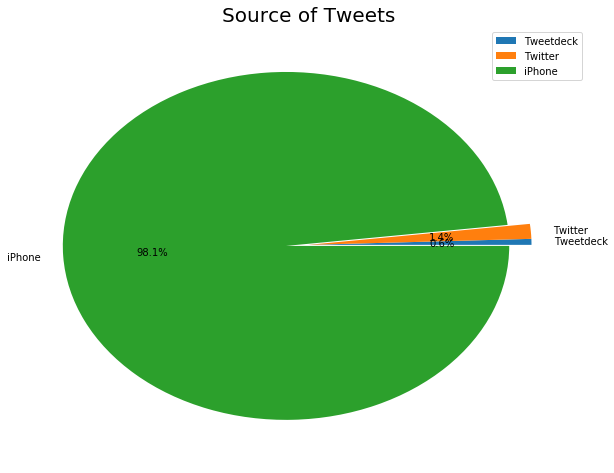

In [80]:
tweet_source = all_df_new.groupby('source').count()[['id']]
tweet_source.rename(columns={'id': 'source_count'}, inplace=True)
tweet_source['source_%'] = tweet_source.source_count / tweet_source.source_count.sum() * 100
tweet_source['source_%'].plot.pie(figsize=(10,8), autopct='%1.1f%%',explode=(0,0,0.1))
plt.title("Source of Tweets", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "iPhone"])
plt.ylabel("")

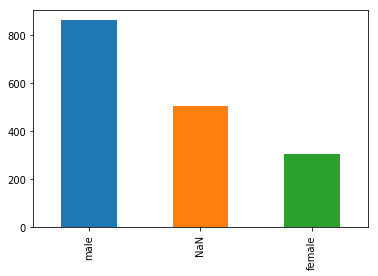

In [81]:
all_df_new.gender.value_counts().plot(kind='bar');

<b>Top 10 Dog breeds according to Retweet & Fav Totals</b>

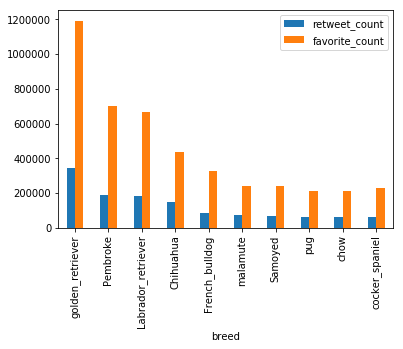

In [82]:
d = all_df_new.groupby('breed')['retweet_count', 'favorite_count'].sum()
d = d.sort_values(['retweet_count', 'favorite_count'], ascending=False)
d.iloc[0:10, :].plot(kind='bar');

<b>Top 10 Dog Names found</b>

Text(0,0.5,'Name')

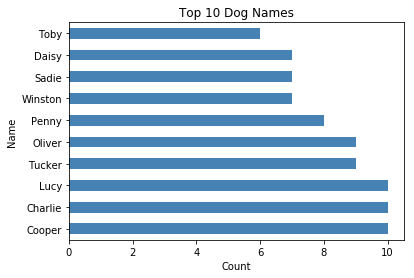

In [83]:
top_names = all_df_new.name.value_counts()[1:11].sort_values(axis=0, ascending=False)
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 Dog Names')
plt.xlabel('Count')
plt.ylabel('Name')

<b>Top Dog Stages</b>

Text(0.5,1,'Top Dog Stages')

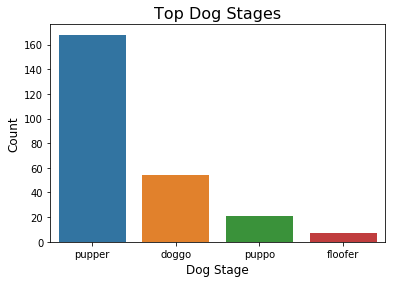

In [84]:
dog_stage = all_df_new['stage'].value_counts()[1:6].index
sns.countplot(data = all_df_new, x = 'stage', order = dog_stage, orient = 'h')
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top Dog Stages',fontsize=16)

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
plt.rcParams["figure.figsize"] = [12,9]

<b>Tweet Count Trend over time</b>

(0, 23.050000000000001)

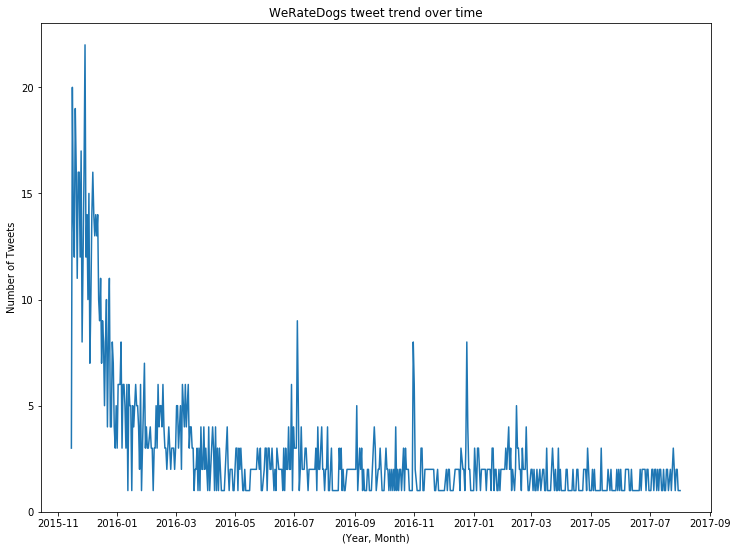

In [86]:
line = all_df_new.name.groupby([all_df_new['tweet_date'].dt.date]).count()
#line = all_df_new.name.groupby([all_df_new['tweet_date']]).count()
lineDate = line.plot('line', title='WeRateDogs tweet trend over time')
lineDate.set_xlabel("(Year, Month)")
lineDate.set_ylabel("Number of Tweets")
lineDate.set_ylim(0, )

<b>Retweet and Favorite trend over time</b>

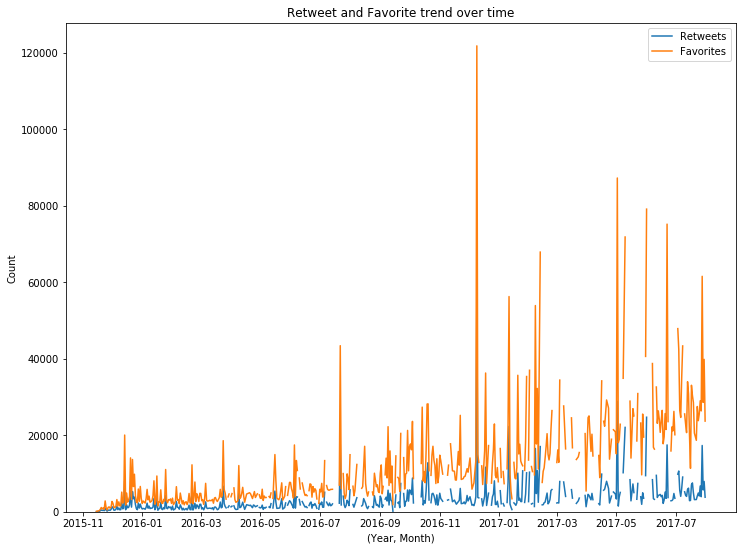

In [87]:
plt.subplots(1, sharex=True)
all_df_new.retweet_count.groupby([all_df_new["tweet_date"].dt.date]).mean().plot('line')
all_df_new.favorite_count.groupby([all_df_new["tweet_date"].dt.date]).mean().plot('line').set_ylim(0, )
plt.title('Retweet and Favorite trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))

<b>Average ratings by Dog Breed</b>

In [88]:
# groups the dataset by dog breeds and computes the average rating for each group
breedRating = all_df_new.groupby('breed')['rating_numerator'].mean()

# filters out dog breed that appear less than 10 times
breedRating = breedRating[all_df_new['breed'].value_counts() > 10].sort_values(ascending=False)
breedRating

breed
soft-coated_wheaten_terrier       20.800000
West_Highland_white_terrier       14.687500
Great_Pyrenees                    14.666667
chow                              14.166667
Labrador_retriever                13.663551
borzoi                            13.545455
Siberian_husky                    13.250000
golden_retriever                  13.081169
Samoyed                           11.690476
Pembroke                          11.410526
Eskimo_dog                        11.409091
cocker_spaniel                    11.333333
kelpie                            11.307692
Bernese_mountain_dog              11.272727
French_bulldog                    11.193548
Cardigan                          11.142857
Rottweiler                        11.105263
Old_English_sheepdog              11.066667
toy_poodle                        11.039216
Pekinese                          11.000000
German_shepherd                   11.000000
schipperke                        10.923077
Pomeranian                

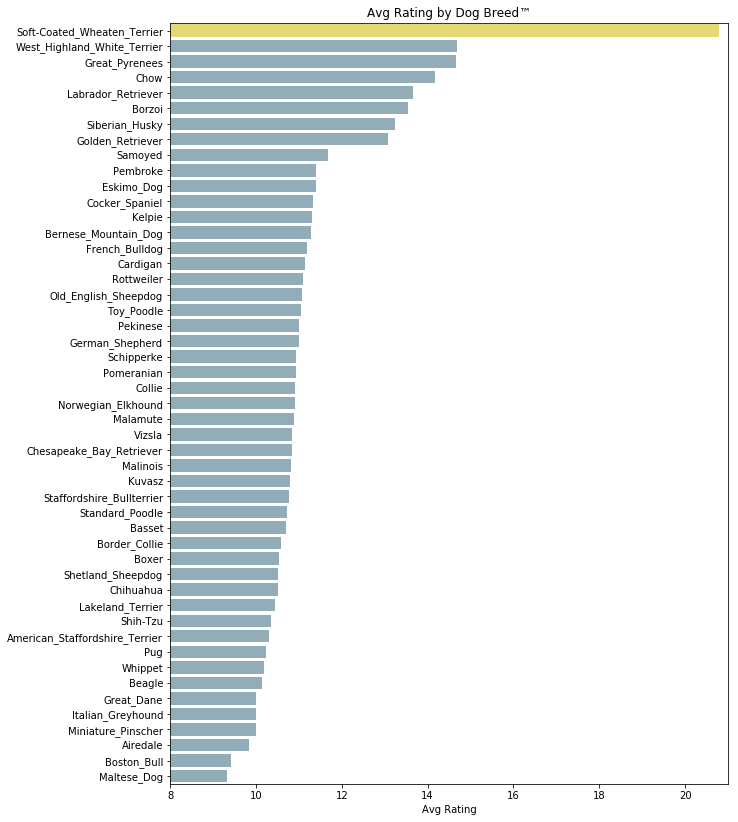

In [89]:
# define axis values
x_axis = list(breedRating)
y_axis = [i.title() for i in breedRating.index]

# plot the bar chart
plt.figure(figsize=[10,14])
plt.xlim(8,21)
plt.xlabel('Avg Rating')
plt.title('Avg Rating by Dog Breed™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();

<b>Most popular Dog(s) according to retweets & Favorites</b>

In [90]:
#Which dog tweet received the most favorites and retweets
#In both cases a Chihuahua named Stephan received the most. 121793 favorites & 57271 retweets
all_df_new[all_df_new.favorite_count == all_df_new.favorite_count.max()]

,tweet_date,source,text,rating_numerator,rating_denominator,name,favorite_count,favorited,full_text,id,retweet_count,retweeted,breed,confidence,stage,gender
tweet_id,,,,,,,,,,,,,,,,
807106840509214720,2016-12-09 06:17:20,iPhone,This is Stephan. He just wants to help. 13/10 ...,13.0,13.0,Stephan,121783.0,False,This is Stephan. He just wants to help. 13/10 ...,8.071068e+17,57263.0,False,Chihuahua,0.50537,,male


In [91]:
all_df_new[all_df_new.retweet_count == all_df_new.retweet_count.max()]

,tweet_date,source,text,rating_numerator,rating_denominator,name,favorite_count,favorited,full_text,id,retweet_count,retweeted,breed,confidence,stage,gender
tweet_id,,,,,,,,,,,,,,,,
807106840509214720,2016-12-09 06:17:20,iPhone,This is Stephan. He just wants to help. 13/10 ...,13.0,13.0,Stephan,121783.0,False,This is Stephan. He just wants to help. 13/10 ...,8.071068e+17,57263.0,False,Chihuahua,0.50537,,male
